In [88]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



%matplotlib inline

In [89]:
!pip install xgboost


In [90]:
import xgboost
from xgboost import XGBClassifier

In [85]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\roych\\AppData\\Local\\Temp\\pip-uninstall-eglk7wcq\\pip.exe'
Consider using the `--user` option or check the permissions.



In [2]:
df_buy = pd.read_csv('Buy_After_Predicted_Rent.csv')
df_buy.head(10)

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent
0,350000,233,4,4,0,0,1,0,0,0,0,3632.417242
1,98000,60,1,2,0,0,1,0,0,0,0,944.463831
2,199900,188,3,3,0,0,1,0,0,0,0,3081.179349
3,235000,200,2,3,0,0,1,0,0,0,0,3402.970136
4,250000,120,2,5,1,0,0,0,0,0,0,1414.624888
5,195000,134,2,3,0,0,1,0,0,0,0,2077.920502
6,375000,208,4,6,0,0,1,0,0,0,0,2587.839765
7,380000,207,3,4,1,0,0,0,0,0,0,3351.740922
8,338500,158,2,2,0,0,1,0,0,0,0,2831.089101
9,125000,86,1,3,0,0,1,0,0,0,0,1195.120712


In [11]:
df_mortgage = df_buy.copy()
df_mortgage.info()
df_mortgage.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   9047 non-null   int64  
 1   Size                    9047 non-null   int64  
 2   Bath                    9047 non-null   int64  
 3   Bed                     9047 non-null   int64  
 4   City_Gondomar           9047 non-null   int64  
 5   City_Guimarães          9047 non-null   int64  
 6   City_Other              9047 non-null   int64  
 7   City_Vila Nova de Gaia  9047 non-null   int64  
 8   City_   Cascais         9047 non-null   int64  
 9   City_   Lisboa          9047 non-null   int64  
 10  City_   Sintra          9047 non-null   int64  
 11  predicted_rent          9047 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 848.3 KB


,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent
0,350000,233,4,4,0,0,1,0,0,0,0,3632.417242
1,98000,60,1,2,0,0,1,0,0,0,0,944.463831
2,199900,188,3,3,0,0,1,0,0,0,0,3081.179349
3,235000,200,2,3,0,0,1,0,0,0,0,3402.970136
4,250000,120,2,5,1,0,0,0,0,0,0,1414.624888


# Calculate the other monthly expense on the property.

Assumptions:
    
-30% downpayment (standard in Portogul)

-4% interest rate (r(monthly rate): 0.003333)

-30 year fixed rate (n(term): 360)

 M = P*r(1+r)^n/((1+r)^n) - 1).

for example
property price - 350,000 euro 
the calculate is - M = (350000 * 0.045 * (1 + 0.045)^360) / ((1 + 0.045)^360 - 1)

In [13]:
# M = P*r(1+r)^n/((1+r)^n) - 1)
#-30% downpayment (standard in Portogul)
#-4% interest rate (r(monthly rate): 0.003333)
#-30 year fixed rate (n(term): 360)
# M = P*r(1+r)^n/((1+r)^n) - 1).
df_mortgage['Monthly_Mortgage']= ((df_mortgage['Price'] * 0.003333 * (1 + 0.003333)**360) / ((1 + 0.003333)**360 -1))
# Print the updated dataframe
print(df_mortgage)

       Price  Size  Bath  Bed  City_Gondomar  City_Guimarães  City_Other  \
0     350000   233     4    4              0               0           1   
1      98000    60     1    2              0               0           1   
2     199900   188     3    3              0               0           1   
3     235000   200     2    3              0               0           1   
4     250000   120     2    5              1               0           0   
...      ...   ...   ...  ...            ...             ...         ...   
9042  710000   125     2    5              0               0           0   
9043  800000   227     3    3              0               0           0   
9044  750000   207     2    4              0               0           1   
9045  800000   201     2    3              0               0           0   
9046  640000   153     2    2              0               0           0   

      City_Vila Nova de Gaia  City_   Cascais  City_   Lisboa  City_   Sintra  \
0     

In [14]:
df_mortgage['Monthly_Mortgage'] = df_mortgage['Monthly_Mortgage'].astype('int64')

In [15]:
df_mortgage.head(10)

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent,Monthly_Mortgage
0,350000,233,4,4,0,0,1,0,0,0,0,3632.417242,1670
1,98000,60,1,2,0,0,1,0,0,0,0,944.463831,467
2,199900,188,3,3,0,0,1,0,0,0,0,3081.179349,954
3,235000,200,2,3,0,0,1,0,0,0,0,3402.970136,1121
4,250000,120,2,5,1,0,0,0,0,0,0,1414.624888,1193
5,195000,134,2,3,0,0,1,0,0,0,0,2077.920502,930
6,375000,208,4,6,0,0,1,0,0,0,0,2587.839765,1790
7,380000,207,3,4,1,0,0,0,0,0,0,3351.740922,1814
8,338500,158,2,2,0,0,1,0,0,0,0,2831.089101,1615
9,125000,86,1,3,0,0,1,0,0,0,0,1195.120712,596


In [19]:
df1 = df_mortgage.copy()
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   9047 non-null   int64  
 1   Size                    9047 non-null   int64  
 2   Bath                    9047 non-null   int64  
 3   Bed                     9047 non-null   int64  
 4   City_Gondomar           9047 non-null   int64  
 5   City_Guimarães          9047 non-null   int64  
 6   City_Other              9047 non-null   int64  
 7   City_Vila Nova de Gaia  9047 non-null   int64  
 8   City_   Cascais         9047 non-null   int64  
 9   City_   Lisboa          9047 non-null   int64  
 10  City_   Sintra          9047 non-null   int64  
 11  predicted_rent          9047 non-null   float64
 12  Monthly_Mortgage        9047 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 919.0 KB


,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent,Monthly_Mortgage
0,350000,233,4,4,0,0,1,0,0,0,0,3632.417242,1670
1,98000,60,1,2,0,0,1,0,0,0,0,944.463831,467
2,199900,188,3,3,0,0,1,0,0,0,0,3081.179349,954
3,235000,200,2,3,0,0,1,0,0,0,0,3402.970136,1121
4,250000,120,2,5,1,0,0,0,0,0,0,1414.624888,1193


# Calculate the other monthly expense on the property.
-1% property tax

-0.5% property insurance

-0.5% of purchase value for yearly expense

the formula is Total monthly expense = Property tax + Property insurance + Yearly expense/12

->  P*0.01 + P*0.005 + P*0.005/12

and it's also ok 
to calculate with Price * 0.0217 instead

In [26]:
df1['Monthly_Other'] = (df1['Price'] * 0.0217)

In [27]:
df1.head()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent,Monthly_Mortgage,Monthly_Other
0,350000,233,4,4,0,0,1,0,0,0,0,3632.417242,1670,759.500
1,98000,60,1,2,0,0,1,0,0,0,0,944.463831,467,212.660
2,199900,188,3,3,0,0,1,0,0,0,0,3081.179349,954,433.783
3,235000,200,2,3,0,0,1,0,0,0,0,3402.970136,1121,509.950
4,250000,120,2,5,1,0,0,0,0,0,0,1414.624888,1193,542.500


In [28]:
# calculate and add a new column that shows the profit that the property owner stay in his 
# bank account after all month
# this is the predicted rent of the property
# after all the expenses such as mortgage and other like apartment taxes
# maintenance and insurance 
df1['Monthly_Profit'] = (df1['predicted_rent'] - df1['Monthly_Mortgage'] - df1['Monthly_Other'])

In [30]:
# stays only with the end profit column
df2 = df1.copy()
df2 = df2.drop(columns = ['predicted_rent', 'Monthly_Mortgage', 'Monthly_Other'])
df2.head()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,Monthly_Profit
0,350000,233,4,4,0,0,1,0,0,0,0,1202.917242
1,98000,60,1,2,0,0,1,0,0,0,0,264.803831
2,199900,188,3,3,0,0,1,0,0,0,0,1693.396349
3,235000,200,2,3,0,0,1,0,0,0,0,1772.020136
4,250000,120,2,5,1,0,0,0,0,0,0,-320.875112


In [31]:
df2.describe()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,Monthly_Profit
count,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000
mean,316962.429093,121.816403,2.000884,2.616116,0.042777,0.050846,0.464463,0.073616,0.061567,0.163922,0.091743,-474.557829
std,186055.444625,54.381514,0.980238,0.965567,0.202364,0.219694,0.498763,0.261159,0.240381,0.370225,0.288679,1234.142881
min,36500.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4187.309129
25%,180000.000000,80.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1213.037084
50%,275000.000000,114.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-380.230453
75%,419000.000000,146.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,340.016640
max,900000.000000,271.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2027.608059


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   9047 non-null   int64  
 1   Size                    9047 non-null   int64  
 2   Bath                    9047 non-null   int64  
 3   Bed                     9047 non-null   int64  
 4   City_Gondomar           9047 non-null   int64  
 5   City_Guimarães          9047 non-null   int64  
 6   City_Other              9047 non-null   int64  
 7   City_Vila Nova de Gaia  9047 non-null   int64  
 8   City_   Cascais         9047 non-null   int64  
 9   City_   Lisboa          9047 non-null   int64  
 10  City_   Sintra          9047 non-null   int64  
 11  Monthly_Profit          9047 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 848.3 KB


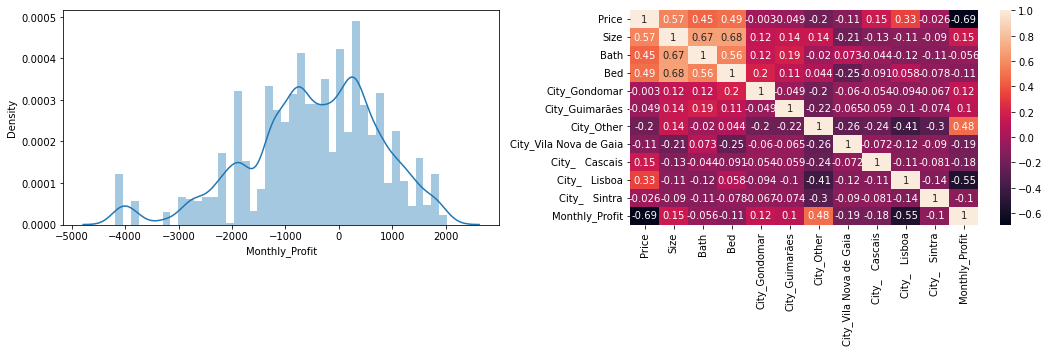

In [36]:
# histogram and heat map
corr = df2.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df2['Monthly_Profit'], ax=axs[0])
sns.heatmap(corr, ax=axs[1], annot=True)
fig.tight_layout()

In [37]:
Df = df2.copy()

In [39]:
Df['good_prop'] = np.where(Df['Monthly_Profit'] > -300, 1, 0)  # good if monthly expense is less than 300
Df = Df.drop(columns = ['Monthly_Profit'])
Df.head()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,good_prop
0,350000,233,4,4,0,0,1,0,0,0,0,1
1,98000,60,1,2,0,0,1,0,0,0,0,1
2,199900,188,3,3,0,0,1,0,0,0,0,1
3,235000,200,2,3,0,0,1,0,0,0,0,1
4,250000,120,2,5,1,0,0,0,0,0,0,0


In [40]:
Df.describe()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,good_prop
count,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000
mean,316962.429093,121.816403,2.000884,2.616116,0.042777,0.050846,0.464463,0.073616,0.061567,0.163922,0.091743,0.474301
std,186055.444625,54.381514,0.980238,0.965567,0.202364,0.219694,0.498763,0.261159,0.240381,0.370225,0.288679,0.499367
min,36500.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180000.000000,80.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275000.000000,114.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,419000.000000,146.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,900000.000000,271.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
# drop rows with bath <0 and bed = 0
Df.drop(Df[(Df.Bath ==0) | (Df.Bed ==0)].index, inplace=True)
Df.drop(Df[Df.Bath < 0].index, inplace=True)
Df.describe()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,good_prop
count,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000,9047.000000
mean,316962.429093,121.816403,2.000884,2.616116,0.042777,0.050846,0.464463,0.073616,0.061567,0.163922,0.091743,0.474301
std,186055.444625,54.381514,0.980238,0.965567,0.202364,0.219694,0.498763,0.261159,0.240381,0.370225,0.288679,0.499367
min,36500.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180000.000000,80.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275000.000000,114.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,419000.000000,146.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,900000.000000,271.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


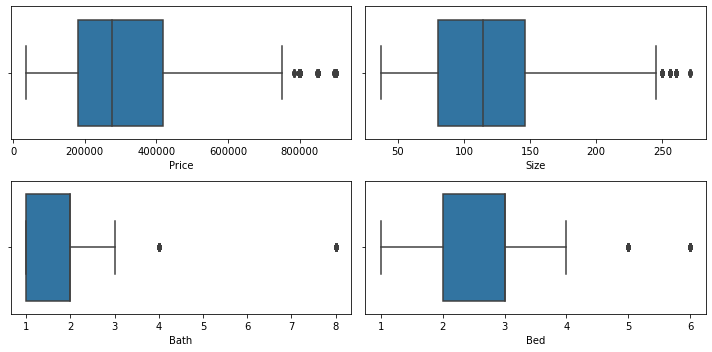

In [94]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Df['Price'], ax = axs[0,0])
plt2 = sns.boxplot(Df['Size'], ax = axs[0,1])
plt1 = sns.boxplot(Df['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(Df['Bed'], ax = axs[1,1])

plt.tight_layout()

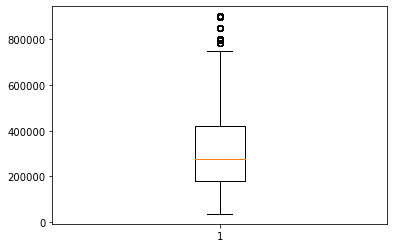

In [95]:
# outlier treatment for Price
plt.boxplot(df2.Price)
Q1 = Df.Price.quantile(0.25)
Q3 = Df.Price.quantile(0.75)
IQR = Q3 - Q1
Df = Df[(Df.Price >= Q1 - 1.5*IQR) & (Df.Price <= Q3 + 1.5*IQR)]

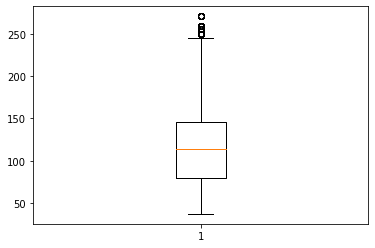

In [96]:
# outlier treatment for Size
plt.boxplot(df2.Size)
Q1 = Df.Size.quantile(0.25)
Q3 = Df.Size.quantile(0.75)
IQR = Q3 - Q1
Df = Df[(Df.Size >= Q1 - 1.5*IQR) & (Df.Size <= Q3 + 1.5*IQR)]

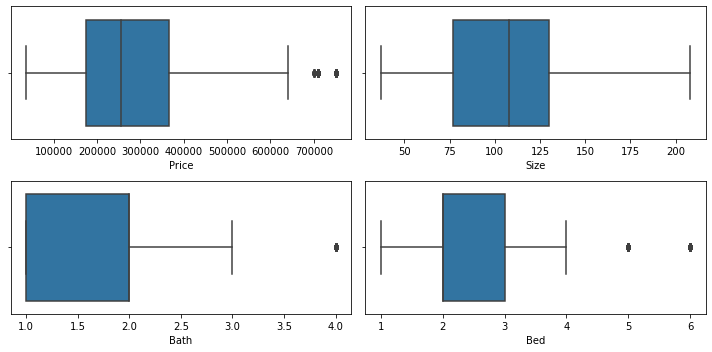

In [97]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Df['Price'], ax = axs[0,0])
plt2 = sns.boxplot(Df['Size'], ax = axs[0,1])
plt1 = sns.boxplot(Df['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(Df['Bed'], ax = axs[1,1])

plt.tight_layout()

In [99]:
Df.drop(Df[(Df.Size ==1)].index, inplace=True)
Df.describe()

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,good_prop
count,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000
mean,282243.381041,109.514152,1.830676,2.499320,0.039921,0.049314,0.467680,0.080707,0.059449,0.164751,0.093314,0.466815
std,151722.458148,42.238506,0.763508,0.919017,0.195785,0.216536,0.498985,0.272401,0.236477,0.370979,0.290889,0.498928
min,36500.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174500.000000,77.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,255000.000000,108.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,365000.000000,130.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,750000.000000,208.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
dfcopy = Df.copy()
dfcopy = dfcopy.drop(columns = ['Price'])


In [136]:
dfcopy.describe()

,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,good_prop
count,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000
mean,109.514152,1.830676,2.499320,0.039921,0.049314,0.467680,0.080707,0.059449,0.164751,0.093314,0.466815
std,42.238506,0.763508,0.919017,0.195785,0.216536,0.498985,0.272401,0.236477,0.370979,0.290889,0.498928
min,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,108.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,130.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,208.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
dfcopy.head()

,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,good_prop
1,60,1,2,0,0,1,0,0,0,0,1
2,188,3,3,0,0,1,0,0,0,0,1
3,200,2,3,0,0,1,0,0,0,0,1
4,120,2,5,1,0,0,0,0,0,0,0
5,134,2,3,0,0,1,0,0,0,0,1


In [103]:
dfcopy.to_csv(r'data_with_good_prop.csv',index=False,header=True)

In [104]:
DF = pd.read_csv('data_with_good_prop.csv')

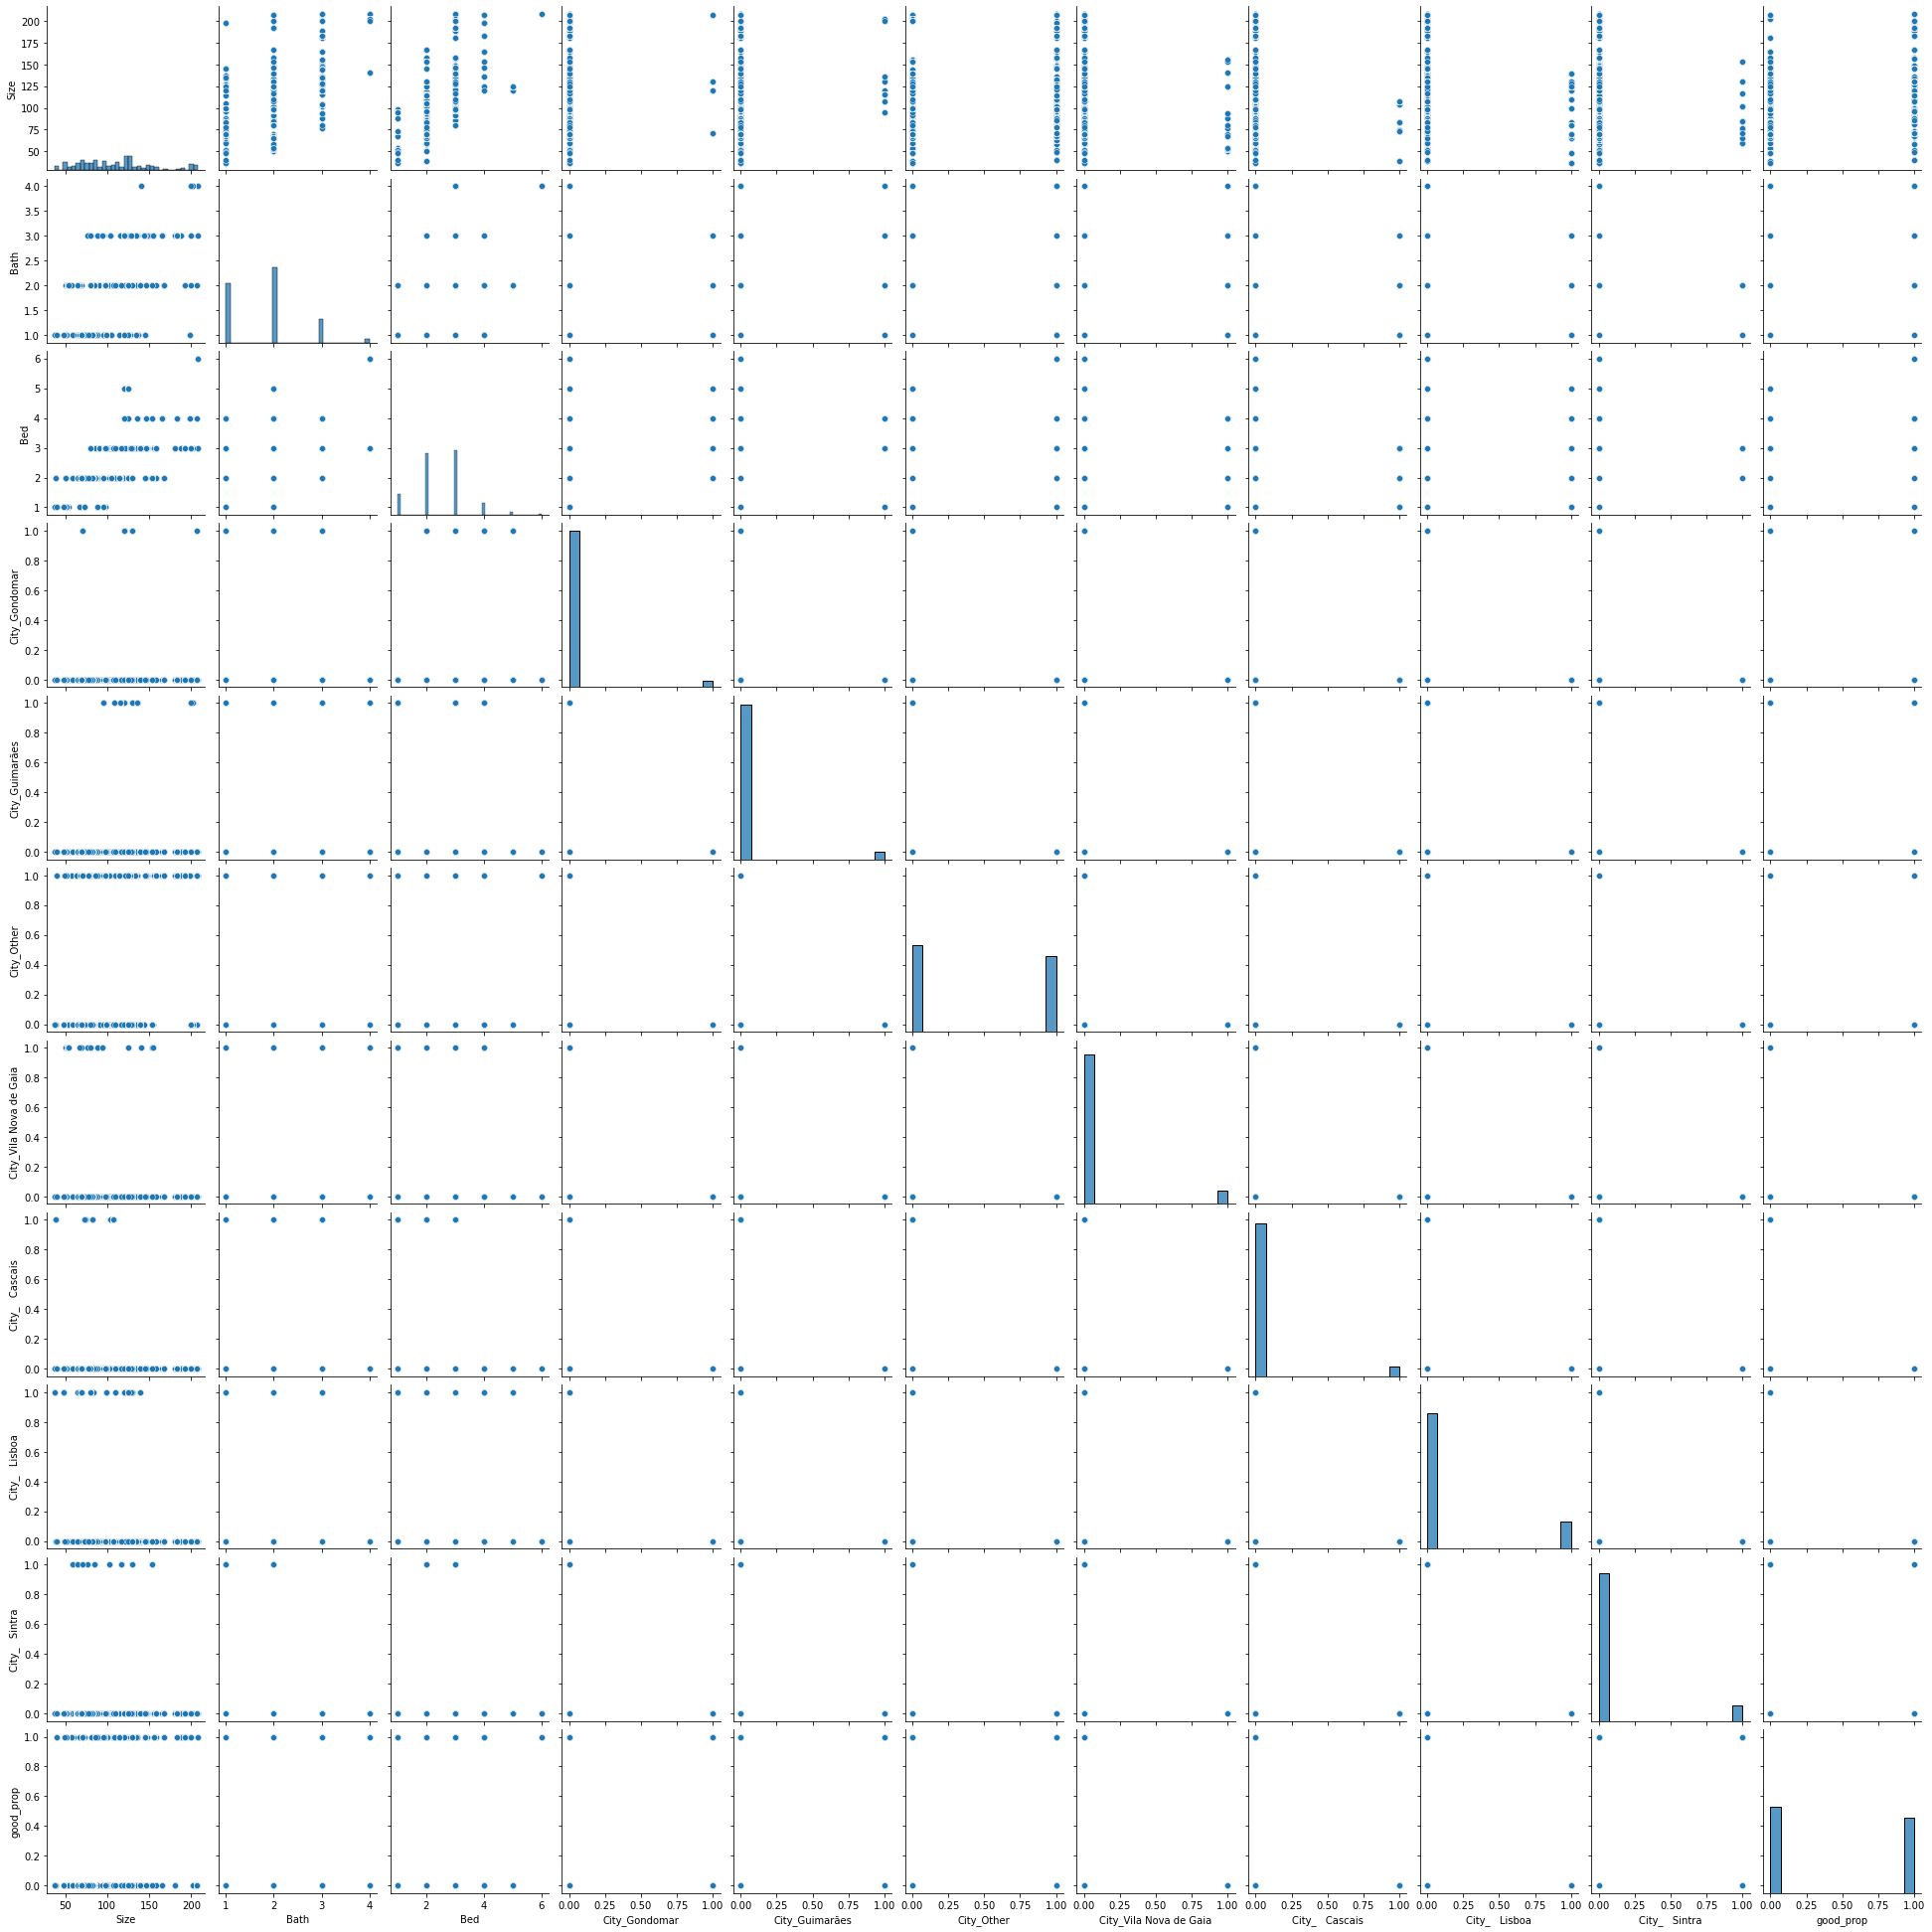

In [105]:
sns.pairplot(DF)
plt.show()

Text(0, 0.5, 'Count')

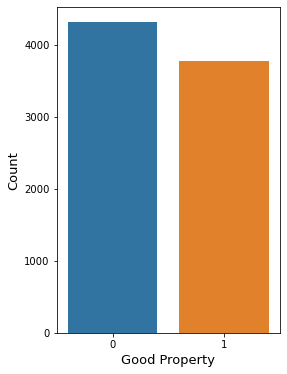

In [106]:
plt.figure(figsize=(4,6))

sns.countplot(x='good_prop', data=DF)
plt.xlabel('Good Property', fontsize=13)
plt.ylabel('Count', fontsize=13)

In [107]:
# Check proportion of minor vs. major
print('not good: {}%'.format(round((DF['good_prop'].value_counts()[0] / DF.shape[0]), 2)*100))
print('good: {}%'.format(round((DF['good_prop'].value_counts()[1] / DF.shape[0]), 2)*100))


not good: 53.0%
good: 47.0%




<font face="Lucida Handwriting
" size=6 color='#CDB79E'> classification model <font>


In [138]:
X = DF.drop(columns = ['good_prop'])
predictors = X.columns
y = DF['good_prop']



<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Logistic Regression <font>


In [139]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

z = StandardScaler()
z.fit(X_train[['Size']])  # size is the only continuous var

X_train['Size'] = z.transform(X_train[['Size']])
X_test['Size'] = z.transform(X_test[['Size']])

# was useful
https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

In [141]:
lr = LogisticRegression()

In [142]:
lr.fit(X_train, y_train)

LogisticRegression()

In [143]:
lr_pred = lr.predict(X_test)

In [144]:
accuracy_score(y_test, lr_pred)

0.8350833848054354

In [145]:
precision, recall, fscore, support = score(y_test, lr_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

Precision : 0.8503412963942452
Recall    : 0.844042266117953
F-score   : 0.834856570677818


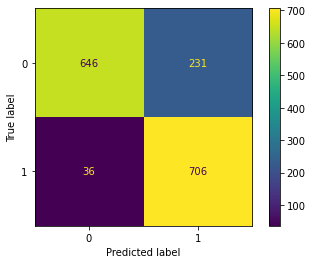

In [146]:
plot_confusion_matrix(lr, X_test, y_test)

In [147]:
# LR Coef interpretation
coef = pd.DataFrame({"Coefs": lr.coef_[0],  #[0] needed for Logistic Regression
                    "Names": predictors})  
coef = coef.append({"Coefs": lr.intercept_[0],  
                    "Names": "intercept"}, ignore_index = True)

In [148]:
# adding odds
coef['Odds Coefs'] = np.exp(coef['Coefs'])
coef

,Coefs,Names,Odds Coefs
0,0.456348,Size,1.578300
1,-0.178418,Bath,0.836593
2,-0.897532,Bed,0.407574
3,1.224858,City_Gondomar,3.403683
4,0.947539,City_Guimarães,2.579354
5,0.004606,City_Other,1.004616
6,-5.978040,City_Vila Nova de Gaia,0.002534
7,-5.509444,City_ Cascais,0.004048
8,-6.251323,City_ Lisboa,0.001928
9,-3.320697,City_ Sintra,0.036128


In [149]:
ypred_prob = lr.predict_proba(X)


In [150]:
ypred_prob1 = ypred_prob[:, 1]

In [151]:
thresh = 0.5

ypred_prob_thresh = (ypred_prob1 > thresh) * 1
accuracy_score(y, ypred_prob_thresh)

0.4668149796069707

In [152]:
# regularization

lr_reg = LogisticRegression(penalty = 'none')
lr_reg.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [153]:
lr_reg_pred = lr_reg.predict(X_test)
accuracy_score(y_test, lr_reg_pred)

0.8350833848054354

<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Decision Tree <font>

In [154]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [155]:
tree_pred = tree.predict(X_test)

accuracy_score(y_test, tree_pred)

1.0

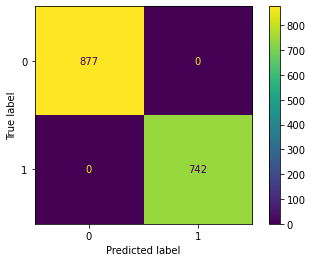

In [156]:
plot_confusion_matrix(tree, X_test, y_test)

In [157]:
tree.get_depth()


10

In [158]:
tree.get_n_leaves()


44

In [159]:
# reducing tree depth
tree15 = DecisionTreeClassifier(max_depth =15)
tree15.fit(X_train, y_train)
tree15_pred = tree.predict(X_test)
accuracy_score(y_test, tree15_pred)

1.0

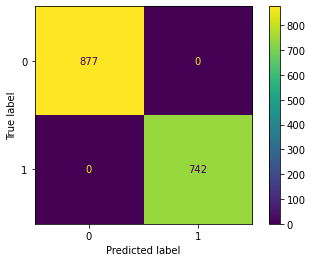

In [160]:
plot_confusion_matrix(tree15, X_test, y_test)


In [161]:
tree15.feature_importances_


array([0.38946872, 0.02933332, 0.09271865, 0.0780129 , 0.08769284,
       0.26197683, 0.00924776, 0.01698107, 0.03456792, 0.        ])

<font face="Lucida Handwriting
" size=6 color='#CDB79E'> Model Comparison <font>

Testing 6 different algorithms:

Logistic Regression (LR)

K-Nearest Neighbors (KNN)

Random Forest (RF)

Decision Trees (DT)

Gaussian Naive Bayes (NB)

Support Vector Machines (SVM)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

z = StandardScaler()
z.fit(X_train[['Size']])  # size is the only continuous var

X_train['Size'] = z.transform(X_train[['Size']])
X_test['Size'] = z.transform(X_test[['Size']])

In [163]:
# Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('XGBoost', XGBClassifier(eval_metric='logloss')))

# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.847653 (0.009985)
KNN: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
DT: 1.000000 (0.000000)
NB: 0.776267 (0.012458)
SVM: 0.854606 (0.008567)
XGBoost: 1.000000 (0.000000)


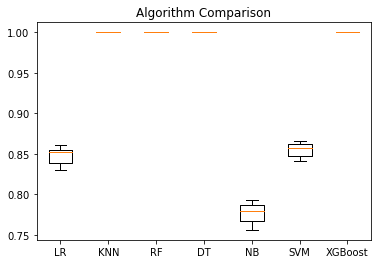

In [164]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [165]:
# Create list of model and accuracy dicts
summaryList = []

# List for storing scores
scores = []

In [166]:
# function to evaluate model and store scores

def model_eval(algorithm, name, X_train, y_train):

    class_model = algorithm

    # Calculate accuracy of train
    acc = cross_val_score(class_model, X_train, y_train).mean()

    class_model.fit(X_train, y_train)

    # Get predictions and probabilities
    y_preds = class_model.predict(X_test)
    y_score = class_model.predict_proba(X_test)

    # Calculate accuracy of test
    acc_test = round(accuracy_score(y_test, y_preds), 3)

    # Get precision, recall, f1-score
    precision, recall, fscore, support = score(y_test, y_preds, average='macro')

    # Add model and accuracy dict to list
    summaryList.append(dict([
        ('Model', name),
        ('Train Accuracy', round(acc, 3)),
        ('Test Accuracy', acc_test),
        ('Precision', round(precision, 3)),
        ('Recall', round(recall, 3)),
        ('F1', round(fscore, 3))
         ]))

    # Add y_score to list
    scores.append(y_score)


In [167]:
model_eval(LogisticRegression(), 'LR', X_train, y_train)
model_eval(KNeighborsClassifier(), 'KNN', X_train, y_train)
model_eval(RandomForestClassifier(), 'Random Forest', X_train, y_train)
model_eval(DecisionTreeClassifier(), 'Dec Tree', X_train, y_train)
model_eval(GaussianNB(), 'Gaussian NB', X_train, y_train)
model_eval(SVC(probability=True), 'SVM', X_train, y_train)
model_eval(XGBClassifier(eval_metric='auc'), 'XGBoost', X_train, y_train)

In [168]:
model_summary = pd.DataFrame(data=summaryList)
model_summary = model_summary[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_summary.drop_duplicates(inplace=True)
model_summary


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,LR,0.847,0.839,0.856,0.851,0.839
1,KNN,1.000,1.000,1.000,1.000,1.000
2,Random Forest,1.000,1.000,1.000,1.000,1.000
3,Dec Tree,1.000,1.000,1.000,1.000,1.000
4,Gaussian NB,0.776,0.754,0.823,0.776,0.748
5,SVM,0.854,0.844,0.858,0.855,0.844
6,XGBoost,1.000,1.000,1.000,1.000,1.000


In [169]:
def plot_roc_curves():
    plt.figure(figsize=(10,6))
    lw = 2
    
    # Logistic Regression
    fpr, tpr, thresholds = roc_curve(y_test, scores[0][:,1], pos_label=1)
    auc_lr = roc_auc_score(y_test, scores[0][:,1])
    plt.plot(fpr, tpr, color='r',
             lw=lw, label='LR, AUC=%.3f' % auc_lr)
        
    # KNN
    fpr, tpr, thresholds = roc_curve(y_test, scores[1][:,1], pos_label=1)
    auc_knn = roc_auc_score(y_test, scores[1][:,1])
    plt.plot(fpr, tpr, color='y',
             lw=lw, label='KNN, AUC=%.3f' % auc_knn)
    
    # Random Forest
    fpr, tpr, thresholds = roc_curve(y_test, scores[2][:,1], pos_label=1)
    auc_rf = roc_auc_score(y_test, scores[2][:,1])
    plt.plot(fpr, tpr, color='b',
             lw=lw, label='Random Forest, AUC=%.3f' % auc_rf)
    
    # Decision Tree
    fpr, tpr, thresholds = roc_curve(y_test, scores[3][:,1], pos_label=1)
    auc_dt = roc_auc_score(y_test, scores[3][:,1])
    plt.plot(fpr, tpr, color='g',
             lw=lw, label='Decision Tree, AUC=%.3f' % auc_dt)
    
    # Gaussian NB
    fpr, tpr, thresholds = roc_curve(y_test, scores[4][:,1], pos_label=1)
    auc_nb = roc_auc_score(y_test, scores[4][:,1])
    plt.plot(fpr, tpr, color='c',
             lw=lw, label='Gaussian NB, AUC=%.3f' % auc_nb)
    
    # SVM
    fpr, tpr, thresholds = roc_curve(y_test, scores[5][:,1], pos_label=1)
    auc_svm = roc_auc_score(y_test, scores[5][:,1])
    plt.plot(fpr, tpr, color='m',
             lw=lw, label='SVM, AUC=%.3f' % auc_svm)    
    
    # XGBoost
    fpr, tpr, thresholds = roc_curve(y_test, scores[6][:,1], pos_label=1)
    auc_xgb = roc_auc_score(y_test, scores[6][:,1])
    plt.plot(fpr, tpr, color='lime',
             lw=lw, label='XGBoost, AUC=%.3f' % auc_xgb)
    
    
    # Formatting
    plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve', fontsize=12)
    plt.legend(loc="lower right")
    plt.show()

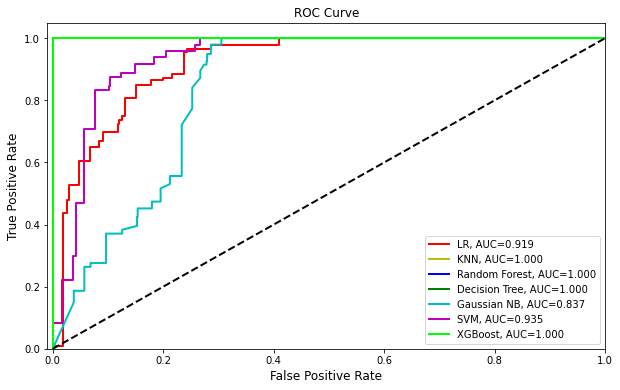

In [170]:
plot_roc_curves()
